In [570]:
#Importing Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from xgboost import XGBRegressor
from sklearn import metrics 


In [571]:
#Imorting dataset

housing = pd.read_csv('Housing1.csv')

In [572]:
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [573]:
#Checking Number of rows and columns in dataset

housing.shape

(545, 13)

In [574]:
#Getting more information about dataset

housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [575]:
#Checking for Missing values

housing.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [576]:
#Statistical Measures of dataset

housing.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

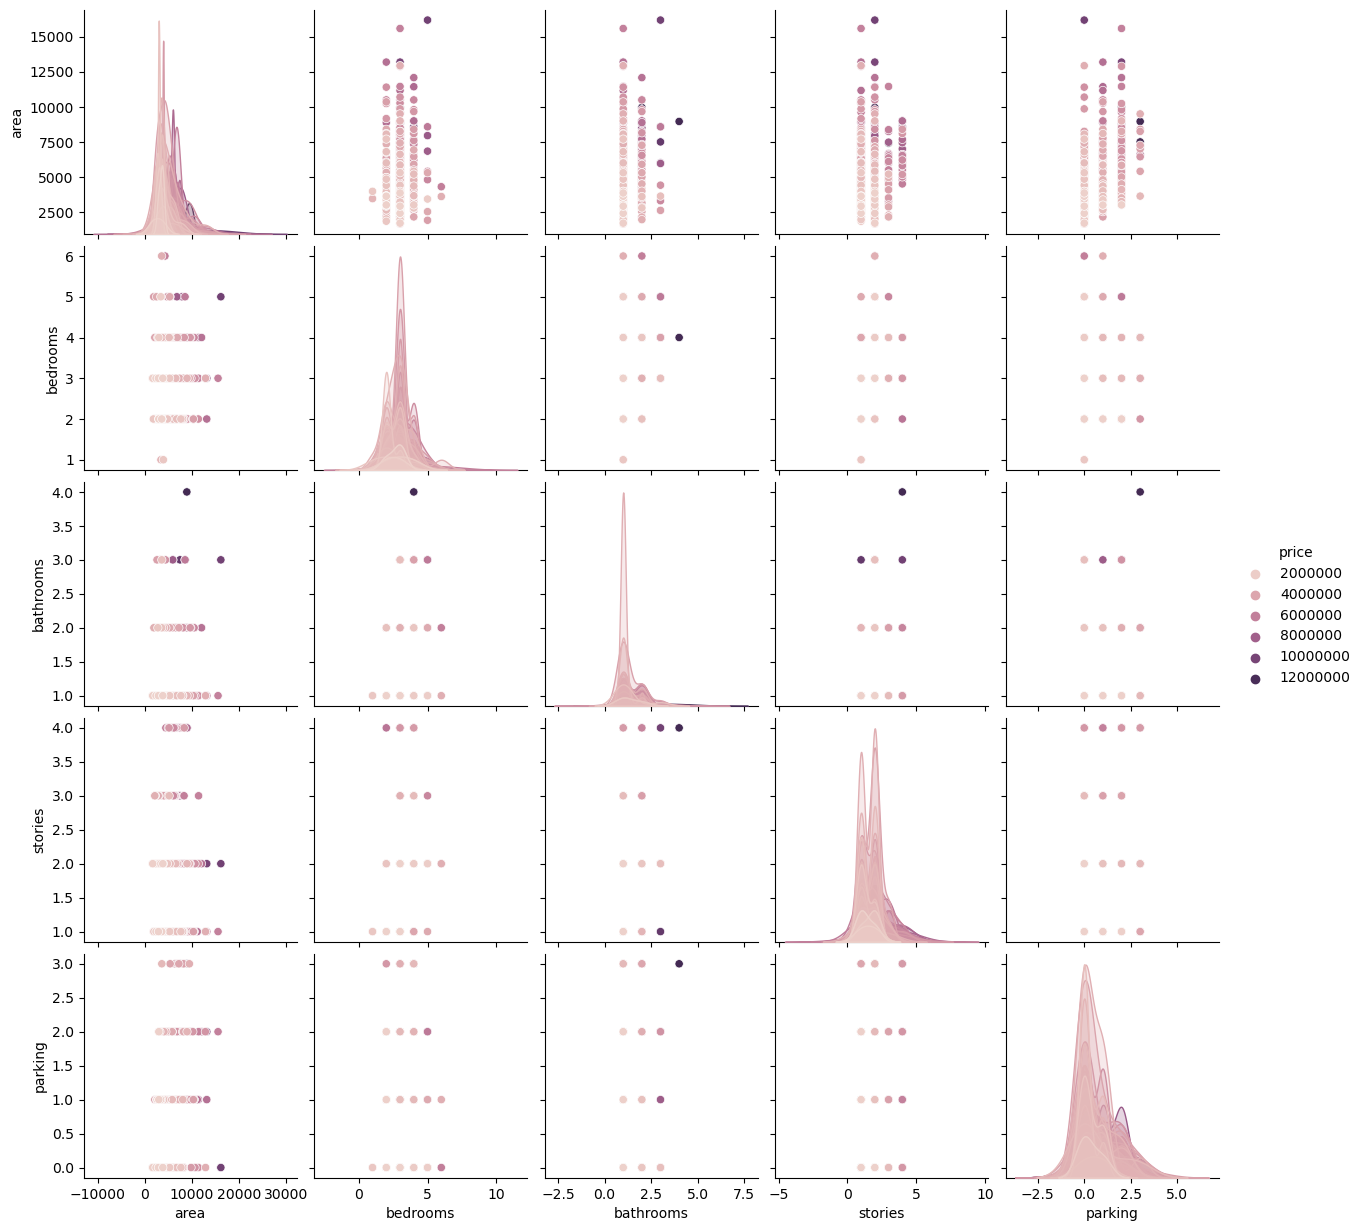

In [577]:
sns.pairplot(housing, hue = 'price')
plt.show()



In [578]:
#Droping Unwanted columns

housing = housing.drop(columns = {'guestroom','hotwaterheating','airconditioning','prefarea','basement','parking'}, axis =1)



In [579]:
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,furnishingstatus
0,13300000,7420,4,2,3,yes,furnished
1,12250000,8960,4,4,4,yes,furnished
2,12250000,9960,3,2,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,furnished
4,11410000,7420,4,1,2,yes,furnished


In [580]:
housing.furnishingstatus.value_counts()

furnishingstatus
semi-furnished    227
unfurnished       178
furnished         140
Name: count, dtype: int64

In [581]:
#Concerting Float datatype columns to Int datatype

housing.replace({'mainroad':{'yes':1, 'no':0}, 'furnishingstatus':{'unfurnished':0, 'semi-furnished':1, 'furnished':2}}, inplace = True)



In [582]:
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,furnishingstatus
0,13300000,7420,4,2,3,1,2
1,12250000,8960,4,4,4,1,2
2,12250000,9960,3,2,2,1,1
3,12215000,7500,4,2,2,1,2
4,11410000,7420,4,1,2,1,2


In [583]:
#correlation b/w colums

housing.corr()


,price,area,bedrooms,bathrooms,stories,mainroad,furnishingstatus
price,1.000000,0.535997,0.366494,0.517545,0.420712,0.296898,0.304721
area,0.535997,1.000000,0.151858,0.193820,0.083996,0.288874,0.171445
bedrooms,0.366494,0.151858,1.000000,0.373930,0.408564,-0.012033,0.123244
bathrooms,0.517545,0.193820,0.373930,1.000000,0.326165,0.042398,0.143559
stories,0.420712,0.083996,0.408564,0.326165,1.000000,0.121706,0.104672
mainroad,0.296898,0.288874,-0.012033,0.042398,0.121706,1.000000,0.156726
furnishingstatus,0.304721,0.171445,0.123244,0.143559,0.104672,0.156726,1.000000


In [584]:
# Splitting the test and train data

X = housing.drop(['price'], axis =1)
Y = housing['price']
 

In [585]:
print(X)

     area  bedrooms  bathrooms  stories  mainroad  furnishingstatus
0    7420         4          2        3         1                 2
1    8960         4          4        4         1                 2
2    9960         3          2        2         1                 1
3    7500         4          2        2         1                 2
4    7420         4          1        2         1                 2
..    ...       ...        ...      ...       ...               ...
540  3000         2          1        1         1                 0
541  2400         3          1        1         0                 1
542  3620         2          1        1         1                 0
543  2910         3          1        1         0                 2
544  3850         3          1        2         1                 0

[545 rows x 6 columns]


In [586]:
print(Y)

0      13300000
1      12250000
2      12250000
3      12215000
4      11410000
         ...   
540     1820000
541     1767150
542     1750000
543     1750000
544     1750000
Name: price, Length: 545, dtype: int64


In [1045]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.4, random_state =25)


In [1046]:
print(X.shape, X_train.shape, X_test.shape)

(545, 6) (327, 6) (218, 6)


In [1047]:
#Model Training

#XGBoost Regressor

model = XGBRegressor()

In [1048]:
model.fit(X_train, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [1049]:
# Evaluation

#accuracy prediction on training data

training_data_prediction = model.predict(X_train)


In [1050]:
#R squared error

score_1 = metrics.r2_score(Y_train, training_data_prediction)

print("R Squared Error : ", score_1)

R Squared Error :  0.9906273063445664


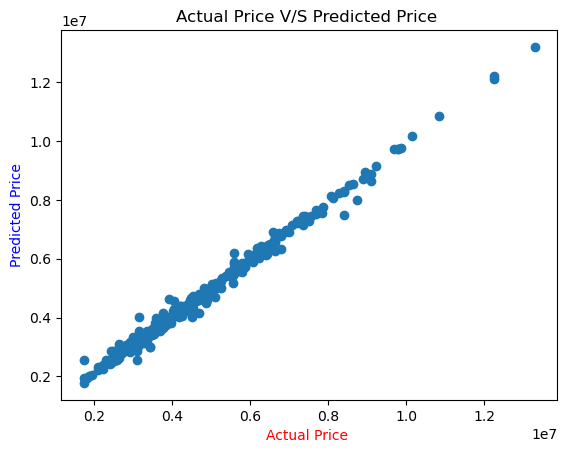

In [1051]:
#Visulaizing the Actual Price and Predicted Price for Training Dataset

plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Actual Price ", color = 'red')
plt.ylabel("Predicted Price", color = 'blue')
plt.title("Actual Price V/S Predicted Price ")
plt.show()

In [1052]:
# Prediction on test data

test_data_prediction = model.predict(X_test)

In [1053]:
#R squared error

score_1 = metrics.r2_score(Y_test, test_data_prediction)

print("R squared Error : ",  score_1)



R squared Error :  0.44303973015201503


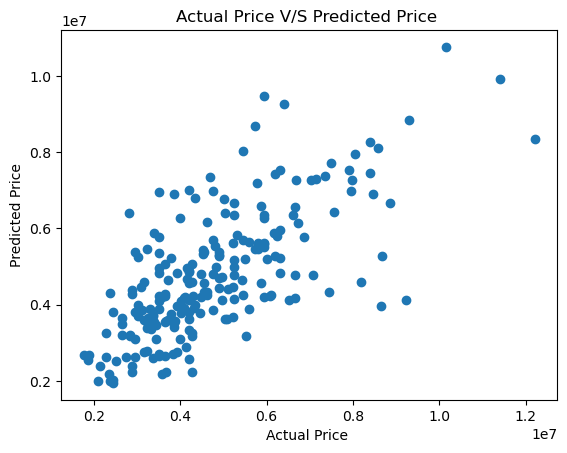

In [1054]:
#Visulaizing the Actual Price and Predicted Price for Testing Dataset

plt.scatter(Y_test, test_data_prediction)
plt.xlabel("Actual Price ")
plt.ylabel("Predicted Price")
plt.title("Actual Price V/S Predicted Price ")
plt.show()